*This project is about Driver Behavior Detection using VGG and ResNet-34 Model.*

In [ ]:
 pip install kaggle

In [ ]:
 mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download robinreni/revitsone-5class

revitsone-5class.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import os

# Specify the path to the downloaded zip file
zip_file_path = '/content/revitsone-5class.zip'

# Specify the directory where you want to extract the contents
extracted_folder_path = '/content/revitsone-5class'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extracted_folder_path)

# List the files in the extracted folder
extracted_files = os.listdir(extracted_folder_path)
print("Extracted files:", extracted_files)


Extracted files: ['Revitsone-5classes', 'revitsone-5classes']


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

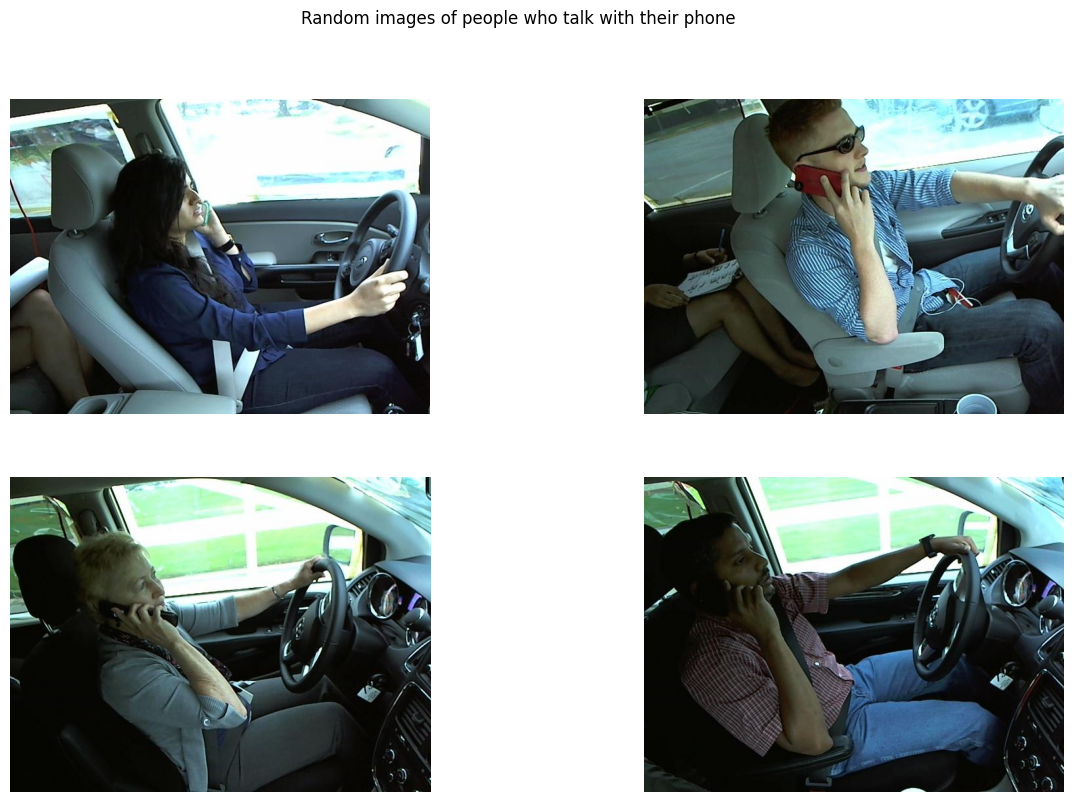

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Specify the path to the directory containing images
image_directory_talking = '/content/revitsone-5class/Revitsone-5classes/talking_phone'

# Get a list of all image files in the directory
image_list_talking = [os.path.join(image_directory_talking, file) for file in os.listdir(image_directory_talking) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Set up the plot
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0

# Display 4 random images
for i in range(4):
    n += 1
    random_img = random.choice(image_list_talking)
    imgs = imread(random_img)

    # Set up plot details
    plt.suptitle("Random images of people who talk with their phone",
                 fontdict={'size': 25, 'backgroundcolor': 'white'})  # Removed 'fontsize'
    plt.subplot(2, 2, n)
    plt.imshow(imgs)
    plt.axis('off')

plt.show()


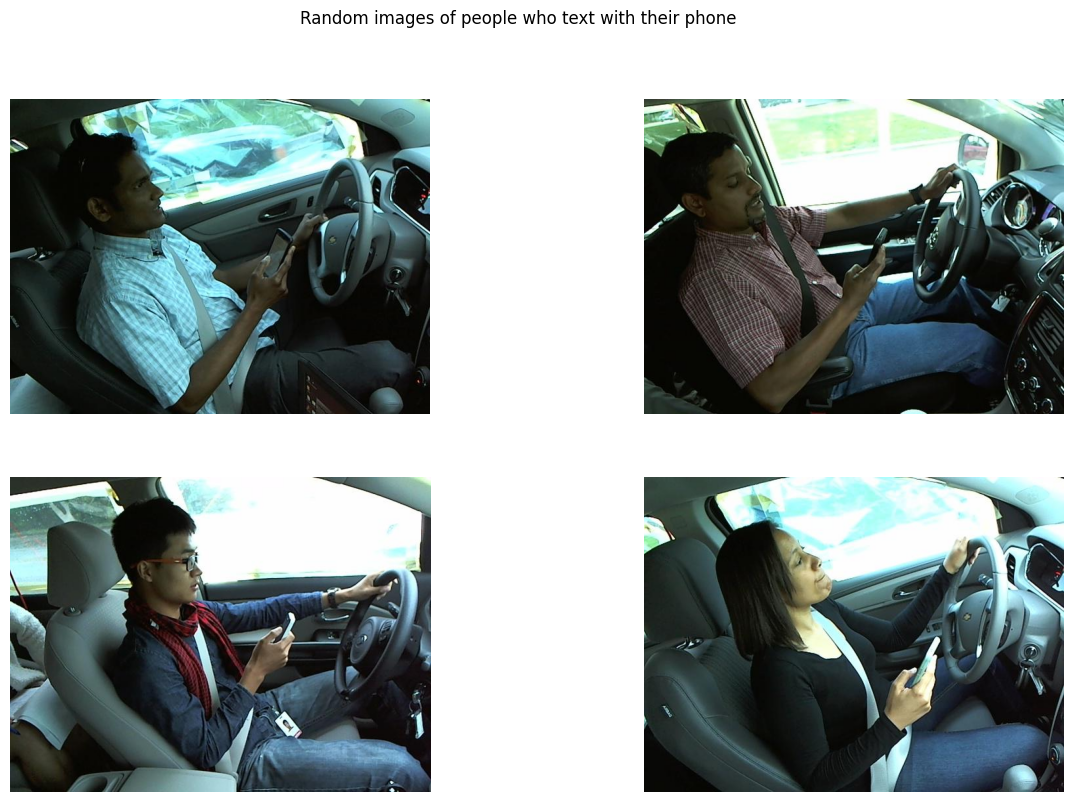

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Specify the path to the directory containing images
image_directory_texting = '/content/revitsone-5class/Revitsone-5classes/texting_phone'

# Get a list of all image files in the directory
image_list_texting = [os.path.join(image_directory_texting, file) for file in os.listdir(image_directory_texting) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Set up the plot
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0

# Display 4 random images
for i in range(4):
    n += 1
    random_img = random.choice(image_list_texting)
    imgs = imread(random_img)

    # Set up plot details
    plt.suptitle("Random images of people who text with their phone",
                 fontdict={'size': 25, 'backgroundcolor': 'white'})  # Removed 'fontsize'
    plt.subplot(2, 2, n)
    plt.imshow(imgs)
    plt.axis('off')

plt.show()


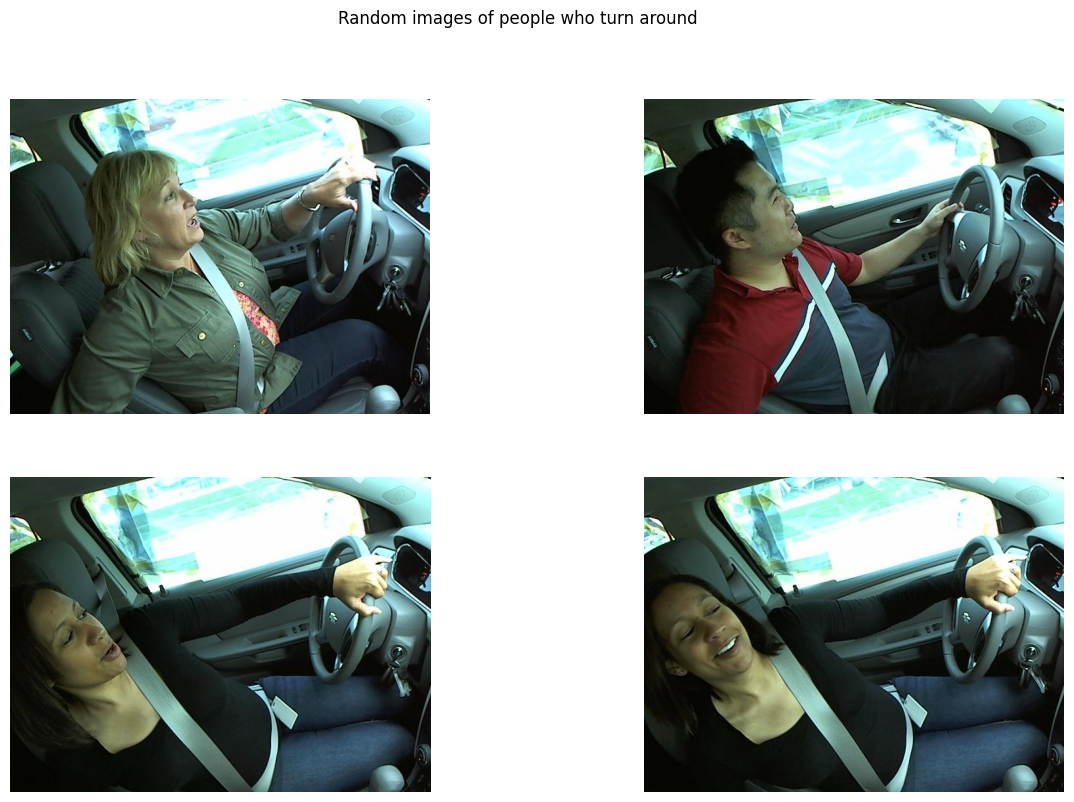

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Specify the path to the directory containing images
image_directory_turning = '/content/revitsone-5class/Revitsone-5classes/turning'

# Get a list of all image files in the directory
image_list_turning = [os.path.join(image_directory_turning, file) for file in os.listdir(image_directory_turning) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Set up the plot
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0

# Display 4 random images
for i in range(4):
    n += 1
    random_img = random.choice(image_list_turning)
    imgs = imread(random_img)

    # Set up plot details
    plt.suptitle("Random images of people who turn around",
                 fontdict={'size': 25, 'backgroundcolor': 'white'})  # Removed 'fontsize'
    plt.subplot(2, 2, n)
    plt.imshow(imgs)
    plt.axis('off')

plt.show()


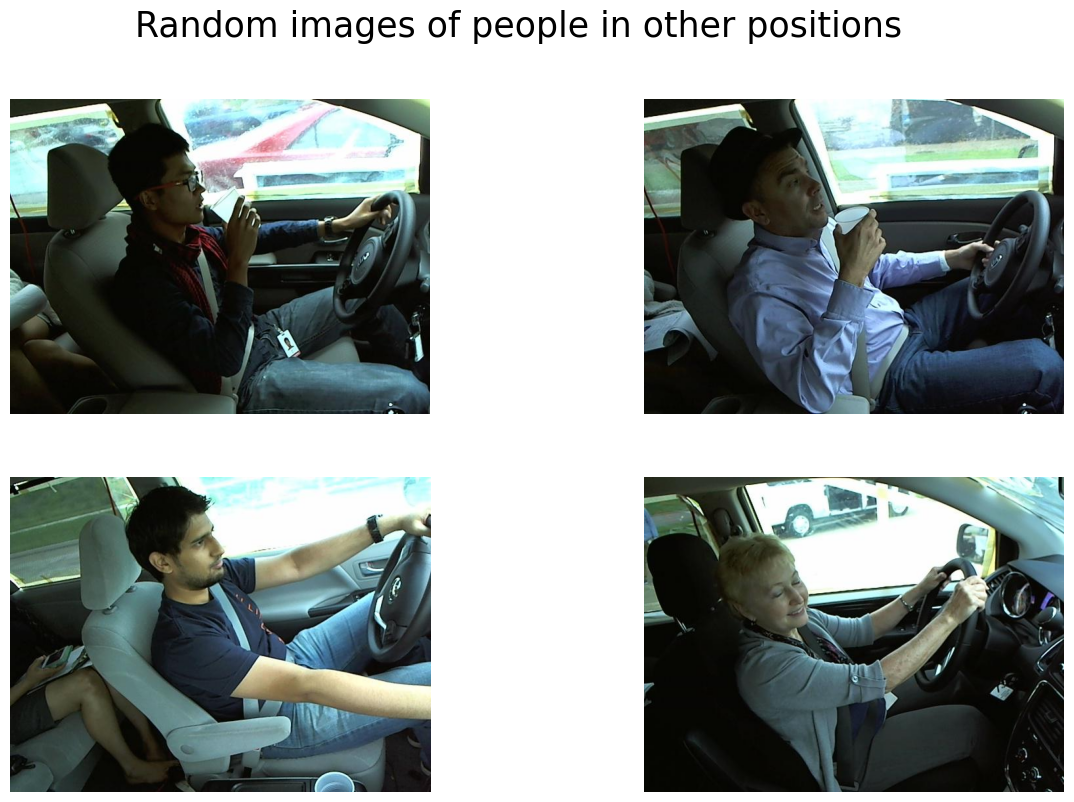

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Specify the path to the directory containing images
image_directory_other_activities = '/content/revitsone-5class/Revitsone-5classes/other_activities'

# Get a list of all image files in the directory
image_list_other_activities = [os.path.join(image_directory_other_activities, file) for file in os.listdir(image_directory_other_activities) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Set up the plot
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0

# Display 4 random images
for i in range(4):
    n += 1
    random_img = random.choice(image_list_other_activities)
    imgs = imread(random_img)

    # Set up plot details
    plt.suptitle("Random images of people in other positions", fontsize=25, backgroundcolor='white')
    plt.subplot(2, 2, n)
    plt.imshow(imgs)
    plt.axis('off')

plt.show()


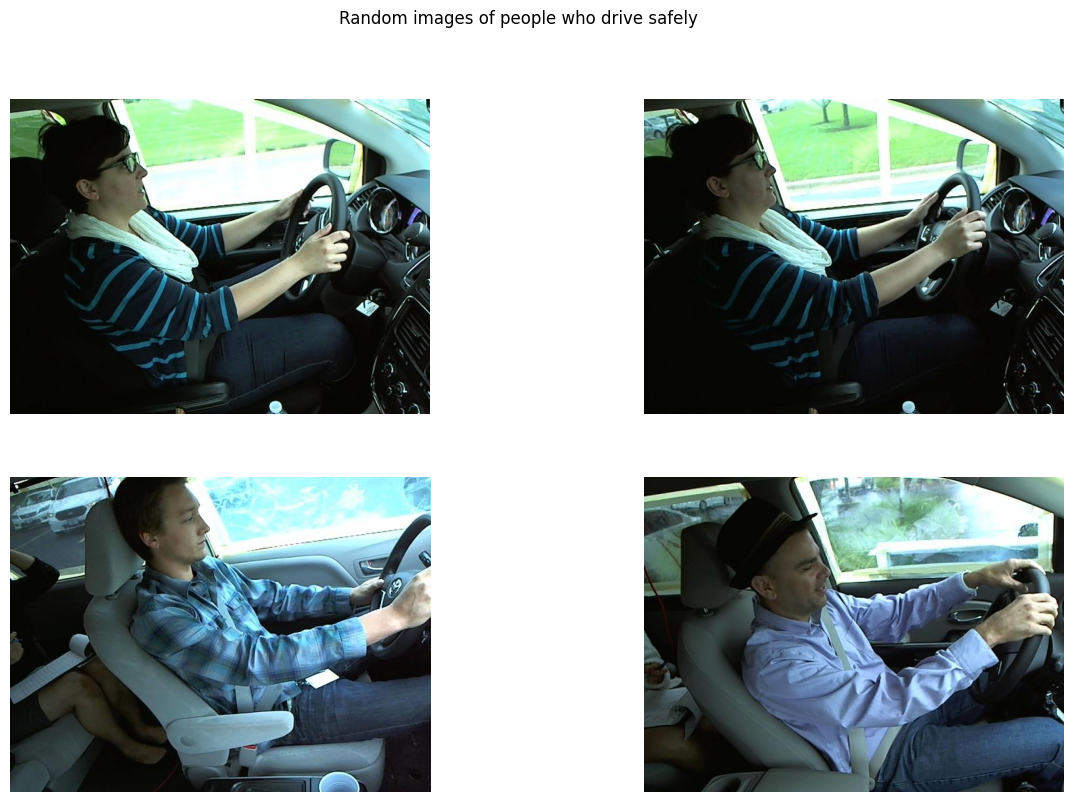

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Specify the path to the directory containing images
image_directory_safe_driving = '/content/revitsone-5class/Revitsone-5classes/safe_driving'

# Get a list of all image files in the directory
image_list_safe_driving = [os.path.join(image_directory_safe_driving, file) for file in os.listdir(image_directory_safe_driving) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Set up the plot
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0

# Display 4 random images
for i in range(4):
    n += 1
    random_img = random.choice(image_list_safe_driving)
    imgs = imread(random_img)

    # Set up plot details
    plt.suptitle("Random images of people who drive safely",
                 fontdict={'size': 25, 'backgroundcolor': 'white'})  # Removed 'fontsize'
    plt.subplot(2, 2, n)
    plt.imshow(imgs)
    plt.axis('off')

plt.show()


Splitting dataset

In [ ]:
print("Number of samples in (Class = Other Activities) =", len(image_list_other_activities))
print("Number of samples in (Class = Safe Driving) =", len(image_list_safe_driving))
print("Number of samples in (Class = Talking Phone) =", len(image_list_talking))
print("Number of samples in (Class = Texting Phone) =", len(image_list_texting))
print("Number of samples in (Class = Turning) =", len(image_list_turning))


Number of samples in (Class = Other Activities) = 2128
Number of samples in (Class = Safe Driving) = 2203
Number of samples in (Class = Talking Phone) = 2169
Number of samples in (Class = Texting Phone) = 2203
Number of samples in (Class = Turning) = 2063


In [ ]:
print(.7 * len(image_list_other_activities), .2 * len(image_list_other_activities), .1 * len(image_list_other_activities))
print(.7 * len(image_list_safe_driving), .2 * len(image_list_safe_driving), .1 * len(image_list_safe_driving))
print(.7 * len(image_list_talking), .2 * len(image_list_talking), .1 * len(image_list_talking))
print(.7 * len(image_list_texting), .2 * len(image_list_texting), .1 * len(image_list_texting))
print(.7 * len(image_list_turning), .2 * len(image_list_turning), .1 * len(image_list_turning))


1489.6 425.6 212.8
1542.1 440.6 220.3
1518.3 433.8 216.9
1542.1 440.6 220.3
1444.1 412.6 206.3


In [ ]:
print("Train", "Test", "Valid")

# Define the percentages for train, test, and valid
train_percentage = 0.7
test_percentage = 0.2
valid_percentage = 0.1

# Calculate the number of samples for each set
total_other = len(image_list_other_activities)
total_safe = len(image_list_safe_driving)
total_talking = len(image_list_talking)
total_text = len(image_list_texting)
total_turn = len(image_list_turning)

# Calculate the indices for each set
train_end_other = int(train_percentage * total_other)
test_end_other = train_end_other + int(test_percentage * total_other)

train_end_safe = int(train_percentage * total_safe)
test_end_safe = train_end_safe + int(test_percentage * total_safe)

train_end_talking = int(train_percentage * total_talking)
test_end_talking = train_end_talking + int(test_percentage * total_talking)

train_end_text = int(train_percentage * total_text)
test_end_text = train_end_text + int(test_percentage * total_text)

train_end_turn = int(train_percentage * total_turn)
test_end_turn = train_end_turn + int(test_percentage * total_turn)

# Split the data into training, testing, and validation sets
train_other = image_list_other_activities[:train_end_other]
test_other = image_list_other_activities[train_end_other:test_end_other]
valid_other = image_list_other_activities[test_end_other:]

train_safe = image_list_safe_driving[:train_end_safe]
test_safe = image_list_safe_driving[train_end_safe:test_end_safe]
valid_safe = image_list_safe_driving[test_end_safe:]

train_talking = image_list_talking[:train_end_talking]
test_talking = image_list_talking[train_end_talking:test_end_talking]
valid_talking = image_list_talking[test_end_talking:]

train_text = image_list_texting[:train_end_text]
test_text = image_list_texting[train_end_text:test_end_text]
valid_text = image_list_texting[test_end_text:]

train_turn = image_list_turning[:train_end_turn]
test_turn = image_list_turning[train_end_turn:test_end_turn]
valid_turn = image_list_turning[test_end_turn:]

# Print the lengths of each set
print(len(train_other), len(test_other), len(valid_other))
print(len(train_safe), len(test_safe), len(valid_safe))
print(len(train_talking), len(test_talking), len(valid_talking))
print(len(train_text), len(test_text), len(valid_text))
print(len(train_turn), len(test_turn), len(valid_turn))


Train Test Valid
1489 425 214
1542 440 221
1518 433 218
1542 440 221
1444 412 207


Create dataframes for train, test, prediction

In [ ]:
import pandas as pd

# Define a function to create a DataFrame
def create_dataframe(images, label):
    return pd.DataFrame({'image': images, 'label': label})

# Create DataFrames for train, test, and validation sets
train_other_df = create_dataframe(train_other, 'Other')
test_other_df = create_dataframe(test_other, 'Other')
valid_other_df = create_dataframe(valid_other, 'Other')

train_safe_df = create_dataframe(train_safe, 'Safe')
test_safe_df = create_dataframe(test_safe, 'Safe')
valid_safe_df = create_dataframe(valid_safe, 'Safe')

train_talking_df = create_dataframe(train_talking, 'Talk')
test_talking_df = create_dataframe(test_talking, 'Talk')
valid_talking_df = create_dataframe(valid_talking, 'Talk')

train_text_df = create_dataframe(train_text, 'Text')
test_text_df = create_dataframe(test_text, 'Text')
valid_text_df = create_dataframe(valid_text, 'Text')

train_turn_df = create_dataframe(train_turn, 'Turn')
test_turn_df = create_dataframe(test_turn, 'Turn')
valid_turn_df = create_dataframe(valid_turn, 'Turn')

# Print the first few rows of each DataFrame
print(train_other_df.head())
print(test_other_df.head())
print(valid_other_df.head())



                                               image  label
0  /content/revitsone-5class/Revitsone-5classes/o...  Other
1  /content/revitsone-5class/Revitsone-5classes/o...  Other
2  /content/revitsone-5class/Revitsone-5classes/o...  Other
3  /content/revitsone-5class/Revitsone-5classes/o...  Other
4  /content/revitsone-5class/Revitsone-5classes/o...  Other
                                               image  label
0  /content/revitsone-5class/Revitsone-5classes/o...  Other
1  /content/revitsone-5class/Revitsone-5classes/o...  Other
2  /content/revitsone-5class/Revitsone-5classes/o...  Other
3  /content/revitsone-5class/Revitsone-5classes/o...  Other
4  /content/revitsone-5class/Revitsone-5classes/o...  Other
                                               image  label
0  /content/revitsone-5class/Revitsone-5classes/o...  Other
1  /content/revitsone-5class/Revitsone-5classes/o...  Other
2  /content/revitsone-5class/Revitsone-5classes/o...  Other
3  /content/revitsone-5class/Revitsone-5

In [ ]:
import pandas as pd

# Define a function to create a DataFrame
def create_dataframe(images, label):
    return pd.DataFrame({'image': images, 'label': label})

# Create DataFrames for test sets
test_other_df = create_dataframe(test_other, 'Other')
test_safe_df = create_dataframe(test_safe, 'Safe')
test_talking_df = create_dataframe(test_talking, 'Talk')
test_text_df = create_dataframe(test_text, 'Text')
test_turn_df = create_dataframe(test_turn, 'Turn')

# Print the first few rows of each DataFrame
print(test_other_df.head())
print(test_safe_df.head())
print(test_talking_df.head())
print(test_text_df.head())
print(test_turn_df.head())


                                               image  label
0  /content/revitsone-5class/Revitsone-5classes/o...  Other
1  /content/revitsone-5class/Revitsone-5classes/o...  Other
2  /content/revitsone-5class/Revitsone-5classes/o...  Other
3  /content/revitsone-5class/Revitsone-5classes/o...  Other
4  /content/revitsone-5class/Revitsone-5classes/o...  Other
                                               image label
0  /content/revitsone-5class/Revitsone-5classes/s...  Safe
1  /content/revitsone-5class/Revitsone-5classes/s...  Safe
2  /content/revitsone-5class/Revitsone-5classes/s...  Safe
3  /content/revitsone-5class/Revitsone-5classes/s...  Safe
4  /content/revitsone-5class/Revitsone-5classes/s...  Safe
                                               image label
0  /content/revitsone-5class/Revitsone-5classes/t...  Talk
1  /content/revitsone-5class/Revitsone-5classes/t...  Talk
2  /content/revitsone-5class/Revitsone-5classes/t...  Talk
3  /content/revitsone-5class/Revitsone-5classes/t.

In [ ]:
import pandas as pd

# Define a function to create a DataFrame for a given set
def create_dataframe(images, label, set_type):
    return pd.DataFrame({'image': images, 'label': label, 'set_type': set_type})

# Create DataFrames for validation sets
valid_other_df = create_dataframe(valid_other, 'Other', 'Valid')
valid_safe_df = create_dataframe(valid_safe, 'Safe', 'Valid')
valid_talking_df = create_dataframe(valid_talking, 'Talk', 'Valid')
valid_text_df = create_dataframe(valid_text, 'Text', 'Valid')
valid_turn_df = create_dataframe(valid_turn, 'Turn', 'Valid')

# Print the first few rows of each DataFrame
print(valid_other_df.head())
print(valid_safe_df.head())
print(valid_talking_df.head())
print(valid_text_df.head())
print(valid_turn_df.head())


                                               image  label set_type
0  /content/revitsone-5class/Revitsone-5classes/o...  Other    Valid
1  /content/revitsone-5class/Revitsone-5classes/o...  Other    Valid
2  /content/revitsone-5class/Revitsone-5classes/o...  Other    Valid
3  /content/revitsone-5class/Revitsone-5classes/o...  Other    Valid
4  /content/revitsone-5class/Revitsone-5classes/o...  Other    Valid
                                               image label set_type
0  /content/revitsone-5class/Revitsone-5classes/s...  Safe    Valid
1  /content/revitsone-5class/Revitsone-5classes/s...  Safe    Valid
2  /content/revitsone-5class/Revitsone-5classes/s...  Safe    Valid
3  /content/revitsone-5class/Revitsone-5classes/s...  Safe    Valid
4  /content/revitsone-5class/Revitsone-5classes/s...  Safe    Valid
                                               image label set_type
0  /content/revitsone-5class/Revitsone-5classes/t...  Talk    Valid
1  /content/revitsone-5class/Revitsone-5cl

In [ ]:
import pandas as pd

# Lists of DataFrames
train_dfs = [train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df]
test_dfs = [test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df]
valid_dfs = [valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df]

# Concatenate DataFrames for train, test, and validation
train_df = pd.concat(train_dfs, ignore_index=True)
test_df = pd.concat(test_dfs, ignore_index=True)
val_df = pd.concat(valid_dfs, ignore_index=True)

# Print the first few rows of each DataFrame
print(train_df.head())
print(test_df.head())
print(val_df.head())


                                               image  label
0  /content/revitsone-5class/Revitsone-5classes/o...  Other
1  /content/revitsone-5class/Revitsone-5classes/o...  Other
2  /content/revitsone-5class/Revitsone-5classes/o...  Other
3  /content/revitsone-5class/Revitsone-5classes/o...  Other
4  /content/revitsone-5class/Revitsone-5classes/o...  Other
                                               image  label
0  /content/revitsone-5class/Revitsone-5classes/o...  Other
1  /content/revitsone-5class/Revitsone-5classes/o...  Other
2  /content/revitsone-5class/Revitsone-5classes/o...  Other
3  /content/revitsone-5class/Revitsone-5classes/o...  Other
4  /content/revitsone-5class/Revitsone-5classes/o...  Other
                                               image  label set_type
0  /content/revitsone-5class/Revitsone-5classes/o...  Other    Valid
1  /content/revitsone-5class/Revitsone-5classes/o...  Other    Valid
2  /content/revitsone-5class/Revitsone-5classes/o...  Other    Valid
3  /

In [ ]:
train_df.head()

image  label
0  /content/revitsone-5class/Revitsone-5classes/o...  Other
1  /content/revitsone-5class/Revitsone-5classes/o...  Other
2  /content/revitsone-5class/Revitsone-5classes/o...  Other
3  /content/revitsone-5class/Revitsone-5classes/o...  Other
4  /content/revitsone-5class/Revitsone-5classes/o...  Other

Calculate the ratio of images

In [ ]:
# import random

# # Assuming 'image' column contains the paths to the images in train_df_filtered
# random_img_path = random.choice(train_df_filtered['image'].values)

# # Rest of your code...
# image = cv2.imread(random_img_path)

# height, width = image.shape[:2]

# print("The height is ", height)
# print("The width is ", width)


Define hyperparameters

In [ ]:
Batch_size = 64
Img_height = 240
Img_width = 240

Rescale the images

In [ ]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [ ]:
import os
import cv2

def is_valid_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return False
        return True
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")
        return False

def filter_valid_images(dataframe):
    dataframe['is_valid'] = dataframe['image'].apply(is_valid_image)
    filtered_dataframe = dataframe[dataframe['is_valid']]
    return filtered_dataframe.drop(columns=['is_valid'])
train_df_filtered = filter_valid_images(train_df)
test_df_filtered = filter_valid_images(test_df)
val_df_filtered = filter_valid_images(val_df)


In [ ]:
trainDataset_filtered = trainGenerator.flow_from_dataframe(
    dataframe=train_df_filtered,
    class_mode="categorical",
    x_col="image",
    y_col="label",
    batch_size=Batch_size,
    seed=42,
    shuffle=True,
    target_size=(Img_height, Img_width)
)

testDataset_filtered = testGenerator.flow_from_dataframe(
    dataframe=test_df_filtered,
    class_mode='categorical',
    x_col="image",
    y_col="label",
    batch_size=Batch_size,
    seed=42,
    shuffle=True,
    target_size=(Img_height, Img_width)
)

valDataset_filtered = valGenerator.flow_from_dataframe(
    dataframe=val_df_filtered,
    class_mode='categorical',
    x_col="image",
    y_col="label",
    batch_size=Batch_size,
    seed=42,
    shuffle=True,
    target_size=(Img_height, Img_width)
)


Found 7522 validated image filenames belonging to 5 classes.
Found 2148 validated image filenames belonging to 5 classes.
Found 1081 validated image filenames belonging to 5 classes.


In [ ]:
print("Number of rows in filtered train dataframe is: ", len(train_df_filtered))
print("Number of rows in filtered test dataframe is: ", len(test_df_filtered))
print("Number of rows in filtered val dataframe is: ", len(val_df_filtered))


Number of rows in filtered train dataframe is:  7522
Number of rows in filtered test dataframe is:  2148
Number of rows in filtered val dataframe is:  1081


Input Model

In [ ]:
trainDataset_filtered = trainGenerator.flow_from_dataframe(
    dataframe=train_df_filtered,
    class_mode="categorical",
    x_col="image",
    y_col="label",
    batch_size=Batch_size,
    seed=42,
    shuffle=True,
    target_size=(Img_height, Img_width)
)

testDataset_filtered = testGenerator.flow_from_dataframe(
    dataframe=test_df_filtered,
    class_mode='categorical',
    x_col="image",
    y_col="label",
    batch_size=Batch_size,
    seed=42,
    shuffle=True,
    target_size=(Img_height, Img_width)
)

valDataset_filtered = valGenerator.flow_from_dataframe(
    dataframe=val_df_filtered,
    class_mode='categorical',
    x_col="image",
    y_col="label",
    batch_size=Batch_size,
    seed=42,
    shuffle=True,
    target_size=(Img_height, Img_width)
)


Found 7522 validated image filenames belonging to 5 classes.
Found 2148 validated image filenames belonging to 5 classes.
Found 1081 validated image filenames belonging to 5 classes.


Models

In [ ]:
def VGGNet():
    inp = layers.Input((Img_height, Img_width, 3))

    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 238, 238, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 236, 236, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 118, 118, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 118, 118, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 128)     73856 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

def VGGNetFurtherReduced():
    inp = layers.Input((Img_height, Img_width, 3))

    x = layers.Conv2D(16, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(16, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)

    x = layers.Conv2D(32, 3, 1, activation='relu')(x)
    x = layers.Conv2D(32, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)

    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG_further_reduced = models.Model(inputs=inp, outputs=x)

    return model_VGG_further_reduced

model_VGG_further_reduced = VGGNetFurtherReduced()
model_VGG_further_reduced.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv2d_34 (Conv2D)          (None, 238, 238, 16)      448       
                                                                 
 conv2d_35 (Conv2D)          (None, 236, 236, 16)      2320      
                                                                 
 batch_normalization_14 (Ba  (None, 236, 236, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 118, 118, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 116, 116, 32)      4640

In [ ]:
from tensorflow.keras import layers, models

def VGGNetEvenMoreReduced():
    inp = layers.Input((Img_height, Img_width, 3))

    x = layers.Conv2D(4, 3, 1, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)

    x = layers.Conv2D(8, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(16, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG_even_more_reduced = models.Model(inputs=inp, outputs=x)

    return model_VGG_even_more_reduced

model_VGG_even_more_reduced = VGGNetEvenMoreReduced()
model_VGG_even_more_reduced.summary()


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 240, 240, 3)]     0         
                                                                 
 conv2d_68 (Conv2D)          (None, 238, 238, 4)       112       
                                                                 
 batch_normalization_43 (Ba  (None, 238, 238, 4)       16        
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 119, 119, 4)       0         
 ng2D)                                                           
                                                                 
 conv2d_69 (Conv2D)          (None, 117, 117, 8)       296       
                                                                 
 batch_normalization_44 (Ba  (None, 117, 117, 8)       32 

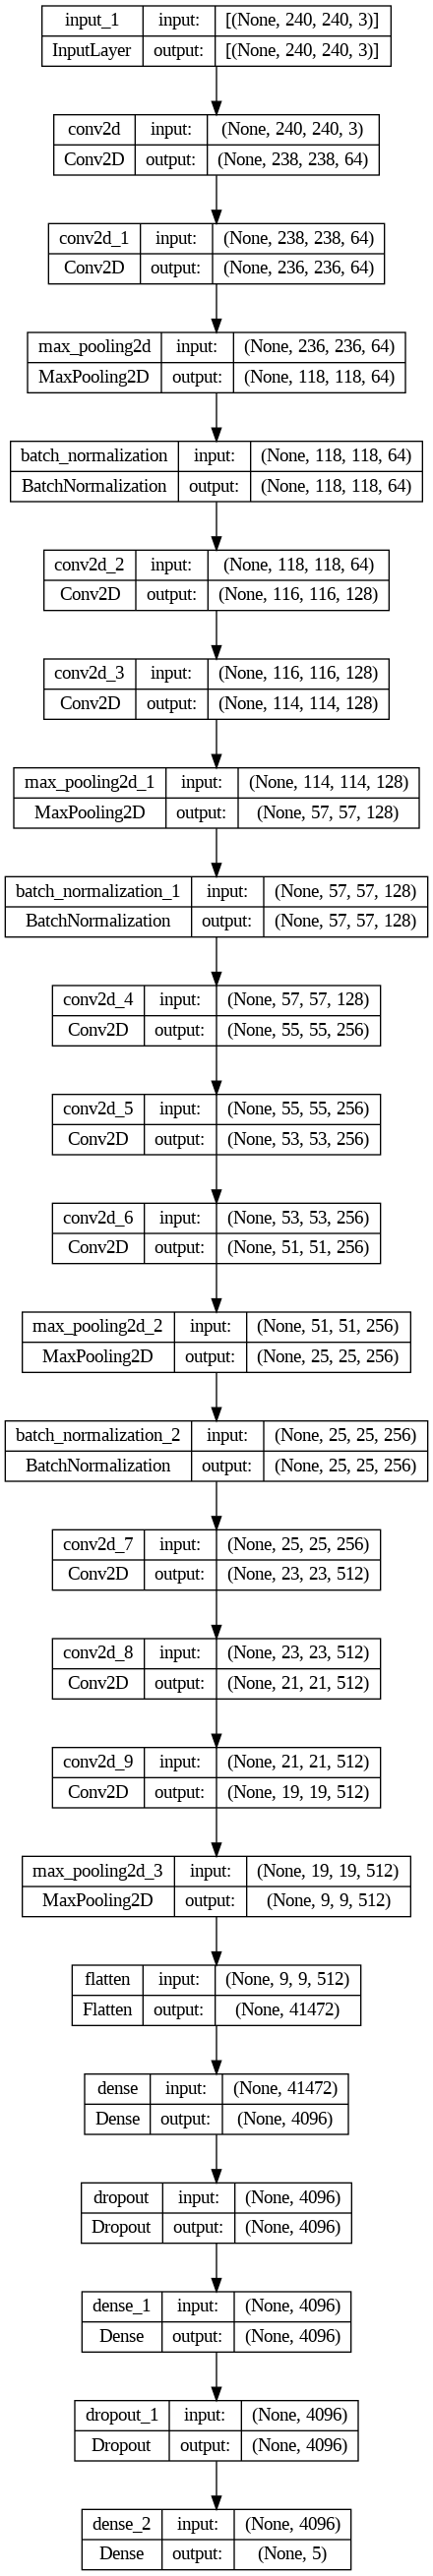

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_layer_names=True
)


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model_VGG_even_more_reduced.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
batch_size = 32
#steps_per_epoch = len(trainDataset_filtered) // batch_size
steps_per_epoch = 10

model_VGG_even_more_reduced = model_VGG_even_more_reduced.fit(
    trainDataset_filtered,
    epochs=20,
    validation_data=valDataset_filtered,
    steps_per_epoch=steps_per_epoch,
    callbacks=[early_stopping]
)


Epoch 1/20
10/10 [==============================] - 41s 4s/step - loss: 1.9744 - accuracy: 0.2377 - val_loss: 1.6053 - val_accuracy: 0.2590
Epoch 2/20
10/10 [==============================] - 43s 5s/step - loss: 1.6024 - accuracy: 0.2391 - val_loss: 1.6047 - val_accuracy: 0.2840
Epoch 3/20
10/10 [==============================] - 44s 5s/step - loss: 1.5600 - accuracy: 0.2705 - val_loss: 1.6014 - val_accuracy: 0.2775
Epoch 4/20
10/10 [==============================] - 45s 5s/step - loss: 1.5323 - accuracy: 0.2969 - val_loss: 1.5951 - val_accuracy: 0.2886
Epoch 5/20
10/10 [==============================] - 43s 4s/step - loss: 1.5507 - accuracy: 0.2844 - val_loss: 1.5862 - val_accuracy: 0.2914
Epoch 6/20
10/10 [==============================] - 39s 4s/step - loss: 1.4604 - accuracy: 0.3219 - val_loss: 1.5797 - val_accuracy: 0.3006
Epoch 7/20
10/10 [==============================] - 42s 4s/step - loss: 1.4419 - accuracy: 0.2951 - val_loss: 1.5763 - val_accuracy: 0.3025
Epoch 8/20
10/10 [==

In [ ]:
training_loss_vgg_further_reduced = model_VGG_even_more_reduced.history['loss']
val_loss_vgg_further_reduced = model_VGG_even_more_reduced.history['val_loss']
training_acc_vgg_further_reduced = model_VGG_even_more_reduced.history['accuracy']
val_acc_vgg_further_reduced = model_VGG_even_more_reduced.history['val_accuracy']

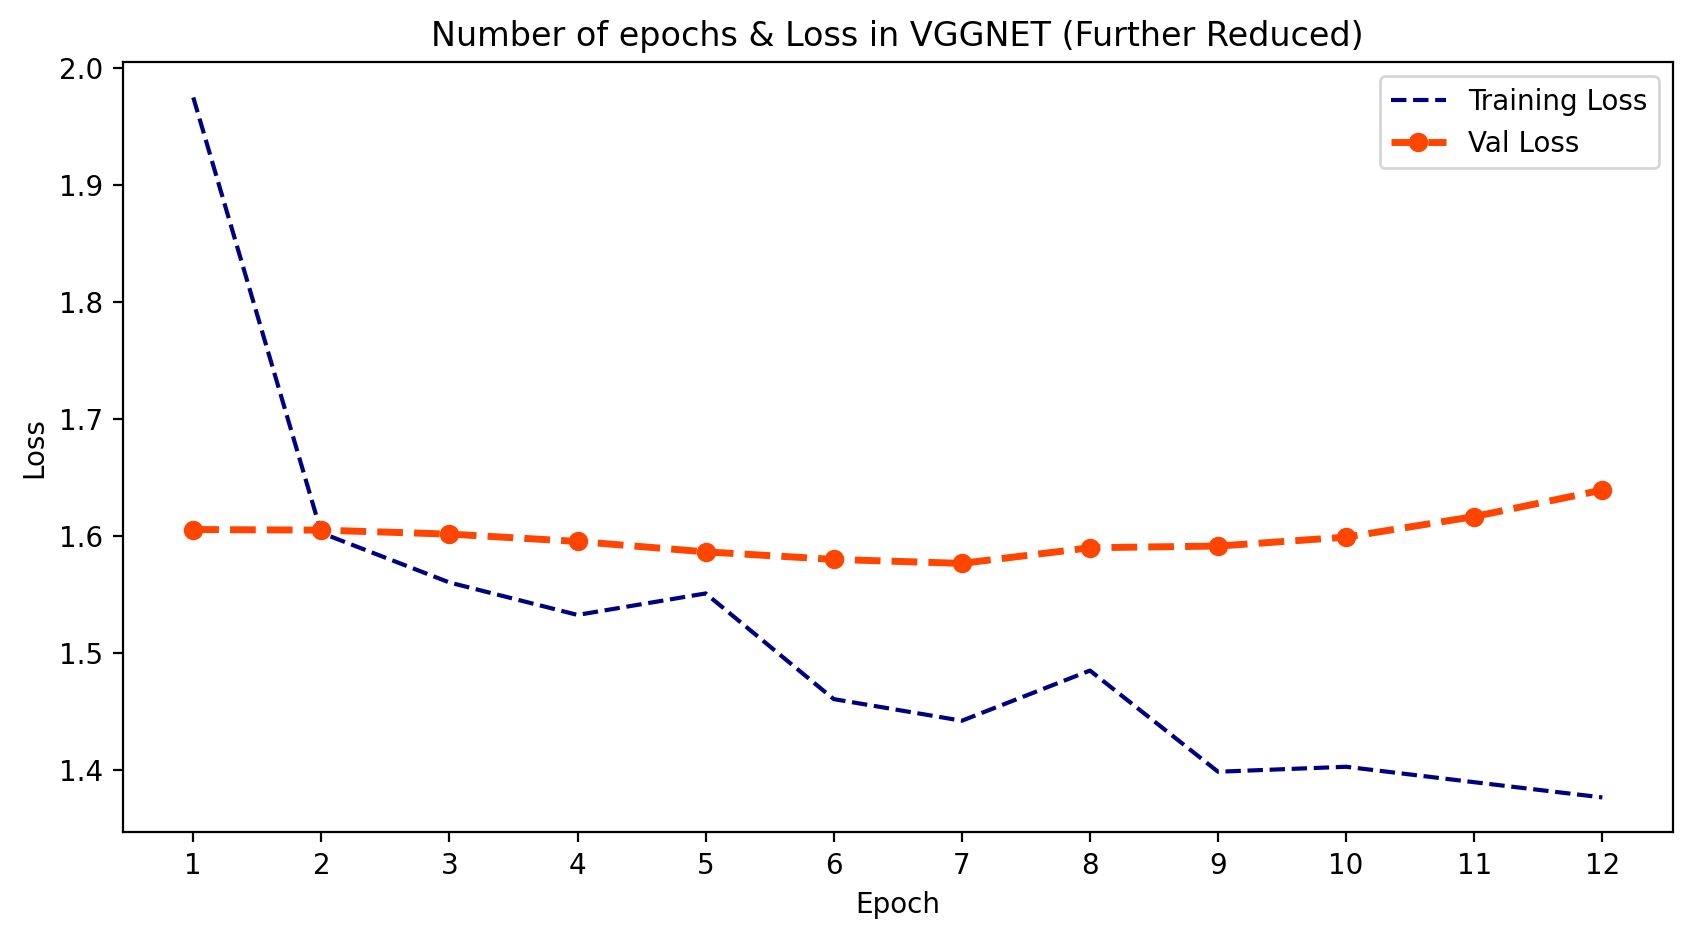

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
epochs = range(1,13)
plt.plot(epochs, training_loss_vgg_further_reduced, 'r--', color='navy')
plt.plot(epochs, val_loss_vgg_further_reduced, '--bo', color='orangered', linewidth='2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in VGGNET (Further Reduced)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.show()


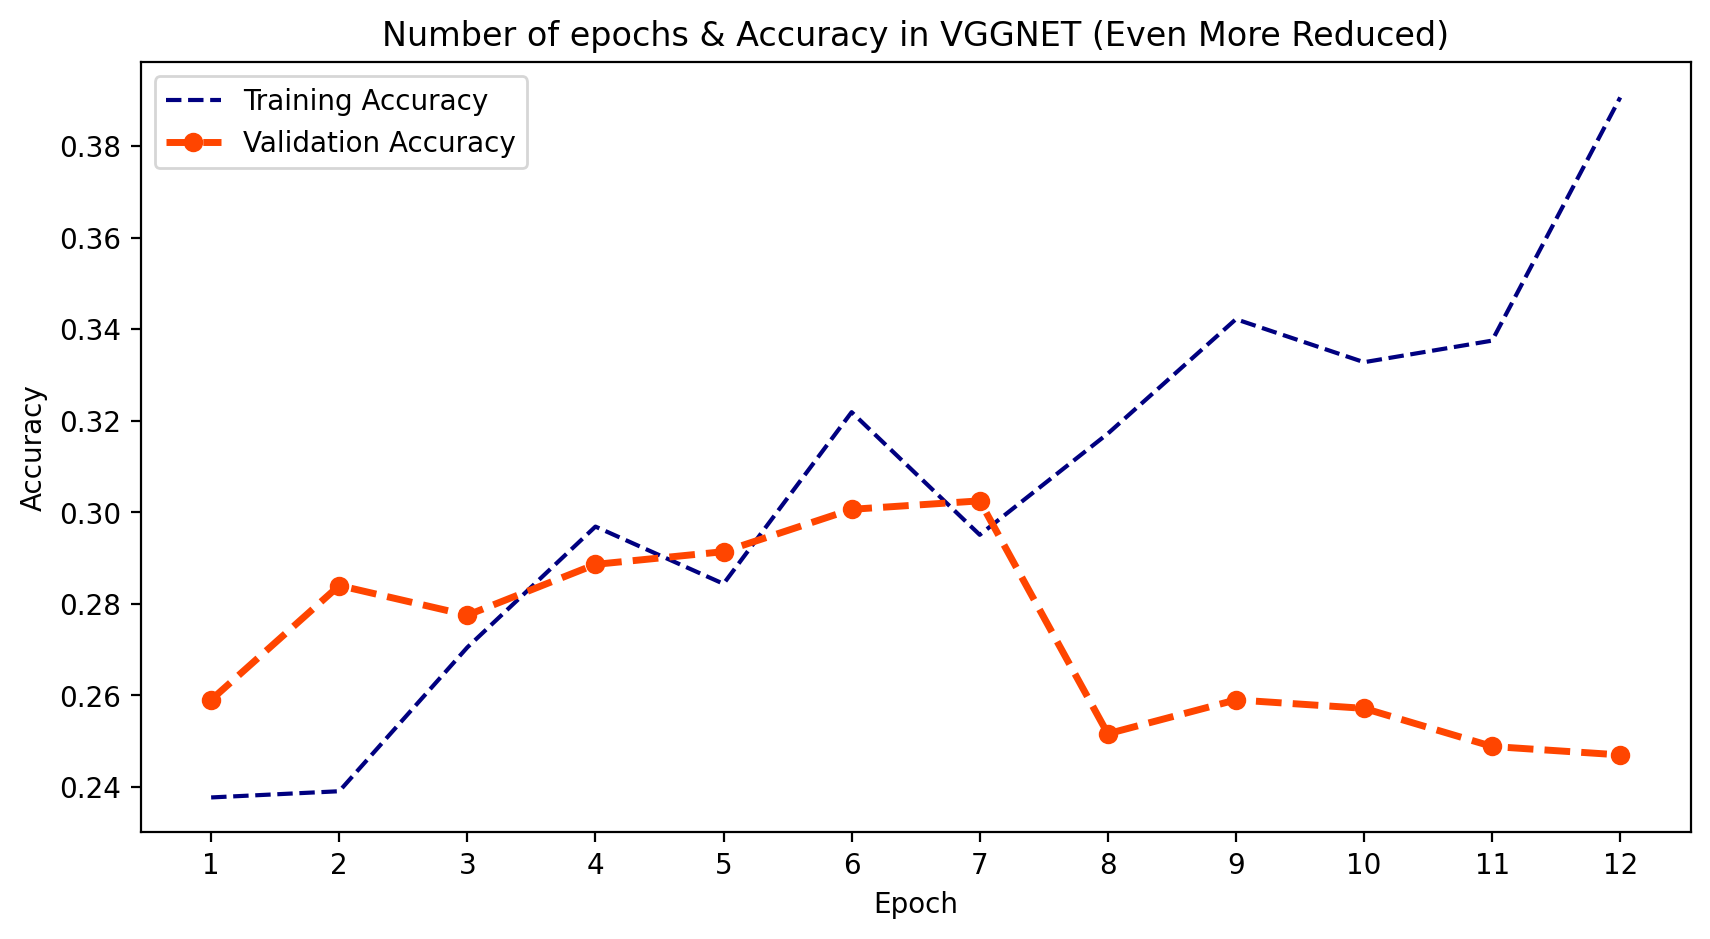

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
epochs = range(1, 13)
plt.plot(epochs, training_acc_vgg_further_reduced, 'r--', color='navy')
plt.plot(epochs, val_acc_vgg_further_reduced, '--bo', color='orangered', linewidth='2.5', label='line with marker')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title('Number of epochs & Accuracy in VGGNET (Even More Reduced)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.show()


In [ ]:
from tensorflow.keras import layers, models

def ResNet34EvenMoreReduced():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(8, 7, 2, padding='valid', activation='relu')(inp)
    x = layers.MaxPooling2D(strides=2, padding='same')(x)

    x = residual_block(x, 8)
    x = residual_block(x, 16, strides=2)
    x = residual_block(x, 32, strides=2)
    x = residual_block(x, 64, strides=2)

    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_Res_even_more_reduced = models.Model(inputs=inp, outputs=x)

    return model_Res_even_more_reduced

def residual_block(x, filters, kernel_size=3, strides=1):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    if strides != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='valid', activation='relu')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)

    return x

model_Res_even_more_reduced = ResNet34EvenMoreReduced()
model_Res_even_more_reduced.summary()


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 240, 240, 3)]        0         []                            
                                                                                                  
 conv2d_44 (Conv2D)          (None, 117, 117, 8)          1184      ['input_9[0][0]']             
                                                                                                  
 max_pooling2d_23 (MaxPooli  (None, 59, 59, 8)            0         ['conv2d_44[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_45 (Conv2D)          (None, 59, 59, 8)            584       ['max_pooling2d_23[0][0

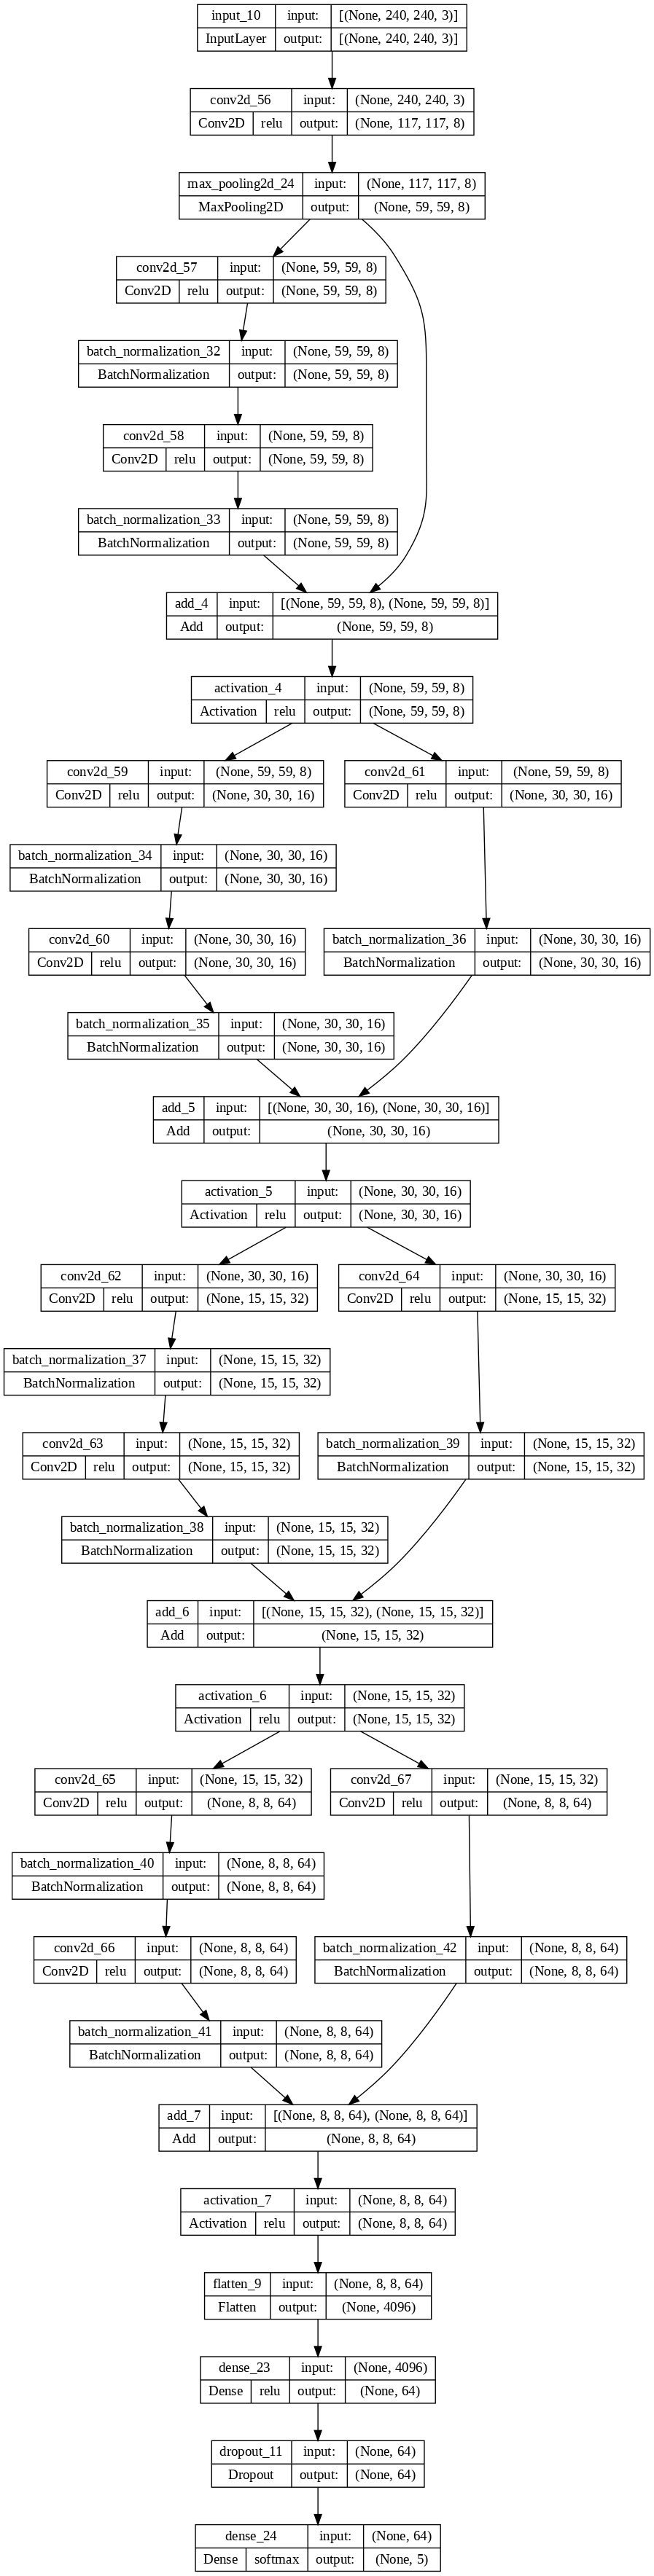

In [ ]:
model_Res_reduced = ResNet34EvenMoreReduced()
plot_model(
    model_Res_reduced,
    to_file='res_model_reduced.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_Res_reduced.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])


In [ ]:
batch_size = 32
#steps_per_epoch = len(trainDataset_filtered) // batch_size
steps_per_epoch = 10

RES_model_reduced = model_Res_reduced.fit(
    trainDataset_filtered,
    epochs=20,
    validation_data=valDataset_filtered,
    steps_per_epoch=steps_per_epoch
)


Epoch 1/20
10/10 [==============================] - 30s 3s/step - loss: 1.9739 - accuracy: 0.2625 - val_loss: 1.6098 - val_accuracy: 0.2183
Epoch 2/20
10/10 [==============================] - 25s 2s/step - loss: 1.5723 - accuracy: 0.2438 - val_loss: 1.6091 - val_accuracy: 0.2118
Epoch 3/20
10/10 [==============================] - 27s 3s/step - loss: 1.5212 - accuracy: 0.2844 - val_loss: 1.6088 - val_accuracy: 0.2044
Epoch 4/20
10/10 [==============================] - 25s 3s/step - loss: 1.4789 - accuracy: 0.3031 - val_loss: 1.6089 - val_accuracy: 0.2340
Epoch 5/20
10/10 [==============================] - 25s 3s/step - loss: 1.4497 - accuracy: 0.3203 - val_loss: 1.6090 - val_accuracy: 0.2026
Epoch 6/20
10/10 [==============================] - 25s 3s/step - loss: 1.4013 - accuracy: 0.3594 - val_loss: 1.6091 - val_accuracy: 0.2229
Epoch 7/20
10/10 [==============================] - 25s 3s/step - loss: 1.3493 - accuracy: 0.3469 - val_loss: 1.6092 - val_accuracy: 0.2137
Epoch 8/20
10/10 [==

In [ ]:
training_loss_res_even_more_reduced = RES_model_reduced.history['loss']
val_loss_res_even_more_reduced = RES_model_reduced.history['val_loss']
training_acc_res_even_more_reduced = RES_model_reduced.history['accuracy']
val_acc_res_even_more_reduced = RES_model_reduced.history['val_accuracy']


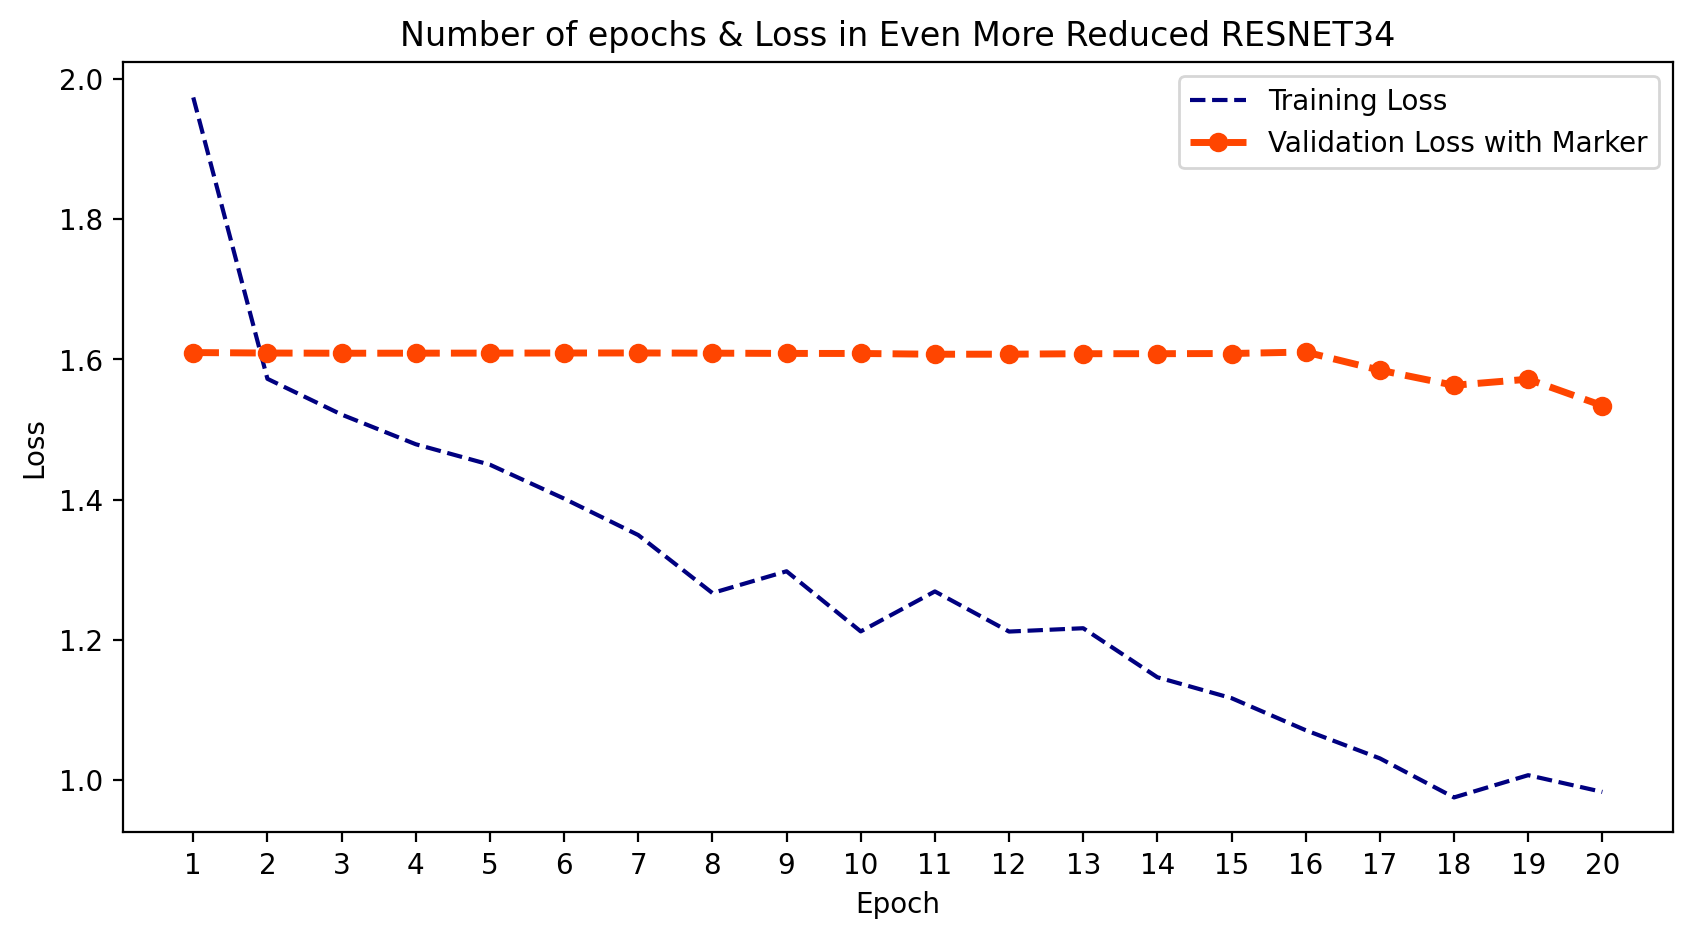

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epoch_count = range(1, len(training_loss_res_even_more_reduced) + 1)

plt.figure(figsize=(10, 5), dpi=200)
plt.plot(epoch_count, training_loss_res_even_more_reduced, 'r--', color='navy', label='Training Loss')
plt.plot(epoch_count, val_loss_res_even_more_reduced, '--bo', color='orangered', linewidth='2.5', label='Validation Loss with Marker')
plt.legend()
plt.title('Number of epochs & Loss in Even More Reduced RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1, 21, 1))
plt.show()


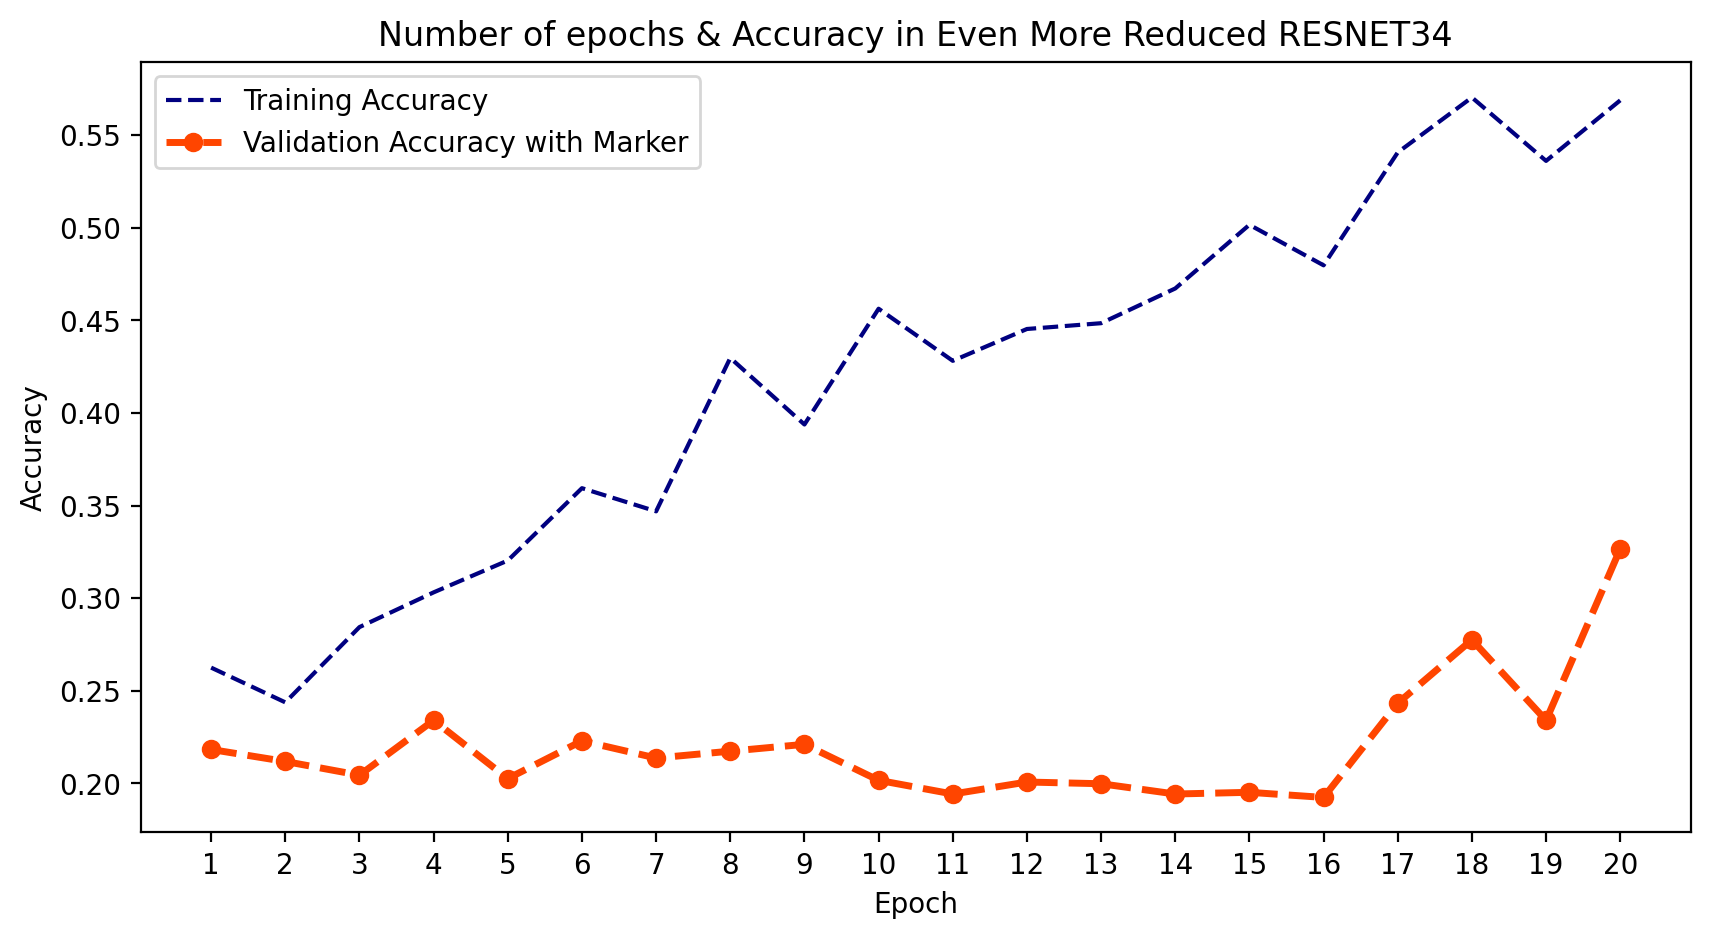

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epoch_count = range(1, len(training_acc_res_even_more_reduced) + 1)

plt.figure(figsize=(10, 5), dpi=200)
plt.plot(epoch_count, training_acc_res_even_more_reduced, 'r--', color='navy', label='Training Accuracy')
plt.plot(epoch_count, val_acc_res_even_more_reduced, '--bo', color='orangered', linewidth='2.5', label='Validation Accuracy with Marker')
plt.legend()
plt.title('Number of epochs & Accuracy in Even More Reduced RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.show()


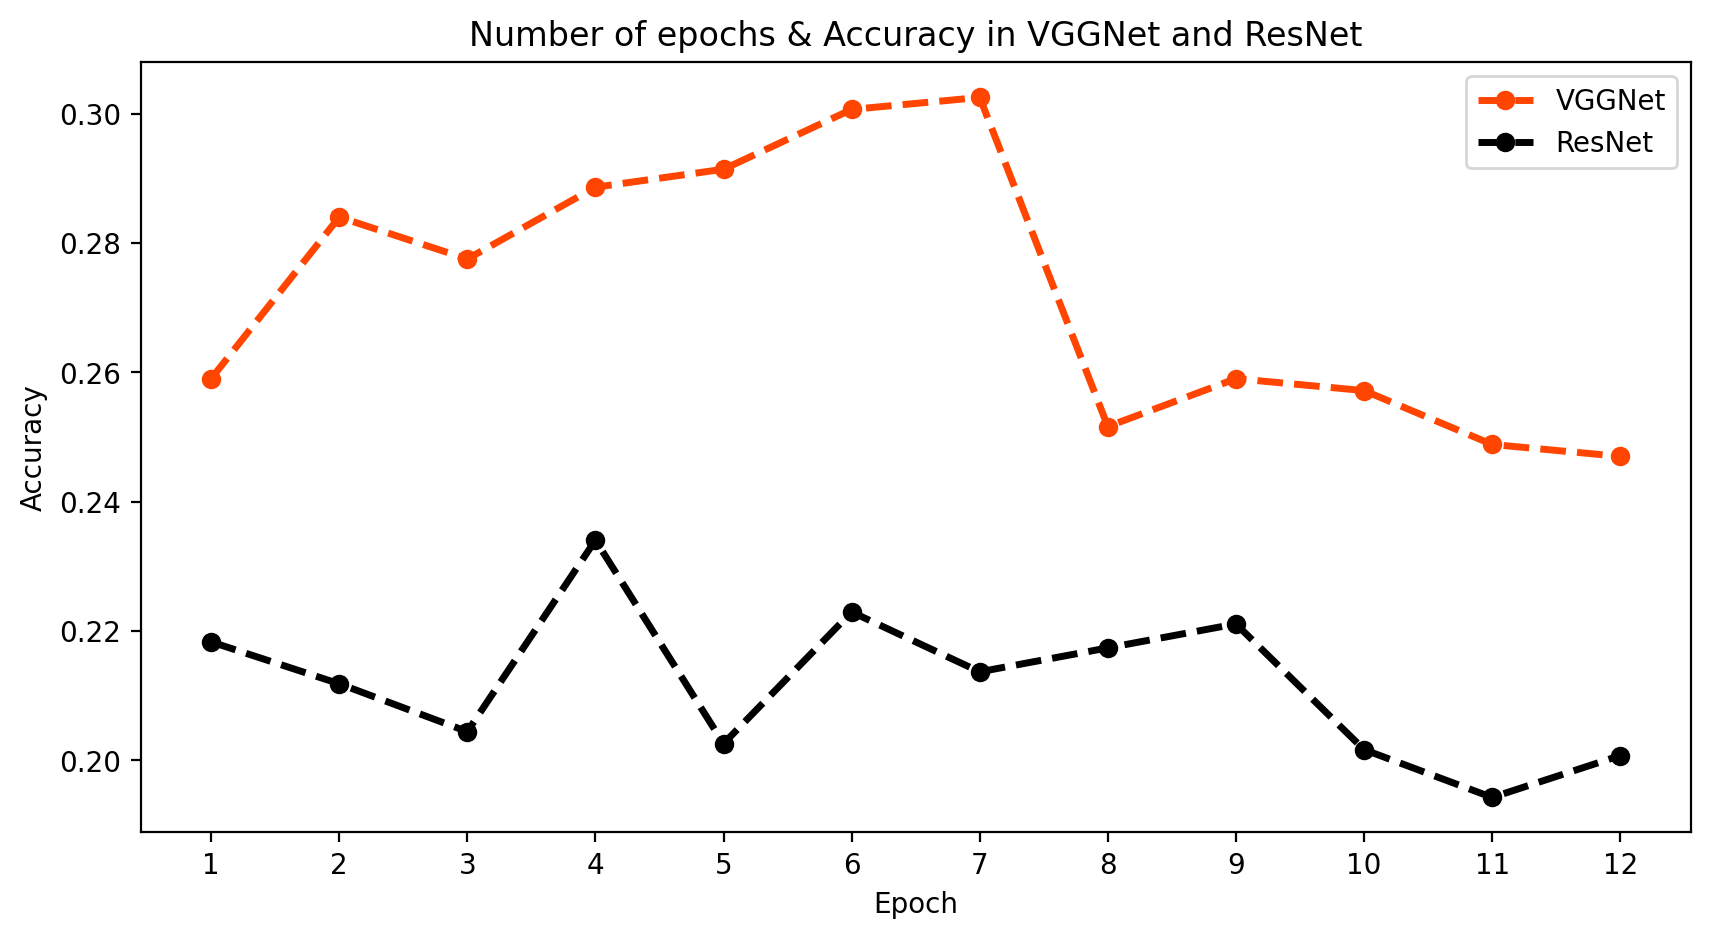

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)

plt.plot(epoch_count[:12], val_acc_vgg_further_reduced[:12], '--bo', color='orangered', linewidth='2.5', label='VGGNet')
plt.plot(epoch_count[:12], val_acc_res_even_more_reduced[:12], '--bo', color='black', linewidth='2.5', label='ResNet')
plt.legend(['VGGNet', 'ResNet'])
plt.title('Number of epochs & Accuracy in VGGNet and ResNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 13, 1))
plt.show()


In [ ]:
from sklearn.metrics import f1_score, classification_report

predictions = model_VGG_further_reduced.predict(testDataset_filtered)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = testDataset_filtered.labels
f1_score_result = f1_score(true_labels, predicted_labels, average='weighted')
classification_report_result = classification_report(true_labels, predicted_labels)

print("F1 Score:", f1_score_result)
print("Classification Report:\n", classification_report_result)


34/34 [==============================] - 102s 3s/step
F1 Score: 0.10824232085205077
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.16      0.18       424
           1       0.17      0.00      0.00       440
           2       0.20      0.83      0.32       433
           3       0.26      0.02      0.03       440
           4       0.00      0.00      0.00       411

    accuracy                           0.20      2148
   macro avg       0.17      0.20      0.11      2148
weighted avg       0.17      0.20      0.11      2148



In [ ]:
from sklearn.metrics import f1_score, classification_report

predictions_res = model_Res_reduced.predict(testDataset_filtered)
predicted_labels_res = np.argmax(predictions_res, axis=1)
true_labels_res = testDataset_filtered.labels
f1_score_res = f1_score(true_labels_res, predicted_labels_res, average='weighted')
classification_report_res = classification_report(true_labels_res, predicted_labels_res)

print("F1 Score for ResNet34:", f1_score_res)
print("Classification Report for ResNet34:\n", classification_report_res)


34/34 [==============================] - 22s 620ms/step
F1 Score for ResNet34: 0.14927374078451142
Classification Report for ResNet34:
               precision    recall  f1-score   support

           0       0.20      0.45      0.28       424
           1       0.25      0.17      0.20       440
           2       0.00      0.00      0.00       433
           3       0.00      0.00      0.00       440
           4       0.20      0.45      0.28       411

    accuracy                           0.21      2148
   macro avg       0.13      0.21      0.15      2148
weighted avg       0.13      0.21      0.15      2148

